# Author Identification

In [21]:
# Packages
import os
import numpy as np
import pandas as pd
import nltk
import random
import xgboost as xgb

nltk.download('wordnet')
nltk.download('omw-1.4')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *

# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# N- Grams
from nltk.util import ngrams
from collections import Counter

# Topic Modeling
##Feature Extraction
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn import ensemble, metrics, model_selection, naive_bayes

# Word 2 Vec
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Models
import datetime
from nltk import naivebayes

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rbnra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rbnra\AppData\Roaming\nltk_data...


In [22]:
# Read Data
train = pd.read_csv('../Data/writing_style_dataset.csv', delimiter='*')
test= pd.read_csv('../Data/writing_style_dataset.csv', delimiter='*')

In [23]:
pd.set_option('max_colwidth', 500)
train.text= train.text.astype(str)
train.author = pd.Categorical(train.author)
train.iloc[:20,:]

,text,author
0,"According to Vance's response to Lauri's email, the nominations should be revised upwards approximately 650/d on the gathering contract(s) at this meter. There is currently nominations of 1,353/d (1,153 gathering and 200 transport). The flow should be around 2,000/d. Is it alright to include the increase of 650/d with the other revisions to be made after trading on Friday?",Robert
1,"Effective 3/1/2001, HPLC amended its contract with Royal Production changing the price to 100% HSC less $0.16 and extending the term through 2/28/02. Consequently, for March, HPLC should be purhasing volumes from two wells at meter 5310. Effective April, HPLC amended the same contract releasing the L.G. Talbert #2 lease in the committed reserves agreement; Mike Morris is the gas buyer and expects volumes of approximately 2000mmbtu/d. For April I nom 1132/d; Bob, we should probably increase...",Vance
2,"Louis Cox with Copano (the interconnecting party at this meter) informed me that effective March 1st, we should have been buying incremental gas from Royal Production at this point since they were no longer selling it to Copano. There have been no changes in the producer services noms at this point, however. This point appears to be on a 14 day chart and the last flow I have access to shows noms of 1332mm with BAV of 3497mm on March 18th. Bob/Vance- could one of you guys check into this a...",Allen
3,"X-cc: Weissman, George </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=88372C14-8DEBAA6B-862564B5-68FD6F>, Daren J Farmer/HOU/ECT@ENRON <??SDaren J Farmer/HOU/ECT@ENRON>, Graves, Melissa </O=ENRON/OU=NA/CN=RECIPIENTS/CN=MGRAVES>, Susan Smith/HOU/ECT@ENRON <??SSusan Smith/HOU/ECT@ENRON>",Taylor
4,"I'm still concern about April's nom; if we don't take it to zero, than we could have the possibility of the allocations group adding volumes to Barrett's April deal. This would be incorrect.",Taylor
5,"HPLC continues to purchase gas from both Ocean and Seneca on a term basis; firm tickets were submitted for April origination beginning with the month of April. As for as Barrett, they are selling their gas under a JOA with Seneca; therefore, 100% of Barrett's production is being paid to Seneca. Consequently, you should see tickets in sitara for both counterparties.",Vance
6,"Are we still purchasing gas at meter 435 from Barrett Resources, Ocean Energy and Seneca Resources? They were on George's spreadsheet but they are not termed up. The only deals termed up are Mariner, St. Mary Land, Walter Oil & Gas and The Meridian Resource.",Cotten
7,"cc:\tJanie Aguayo/HOU/ECT@ECT, Lisa Hesse/HOU/ECT@ECT, Julie Meyers/HOU/ECT@ECT, Cynthia Hakemack/HOU/ECT@ECT, Donald P Reinhardt/ENRON@enronXgate, Susan Smith/ENRON@enronXgate, Melissa Graves/ENRON@enronXgate, George Weissman/HOU/ECT@ECT",Vance
8,"HPLC will be purchasing wellhead gas from the producers listed below for the production month of May, 2001. This production will be purchased on a ""spot"" basis and deal tickets should be created and entered into sitara based on the following information:",Vance
9,"El Paso Merchant Energy, LP\t\t5848\t\t\t203mmbtu/d\t\t\t 85% IF/HSC \t\t \t\t\t Swift Energy\t\t\t2630\t\t\t 21mmbtu/d\t\t\t100% IF/HSC less $1.38",Vance


In [24]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [ps.stem(w) for w in words] #4
    words = [lemmatizer.lemmatize(w) for w in words]#5

    return words

def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)

In [25]:
# test case to see if our stemmering and lemmatization is running sussefully
print("The stemmed form of running is: {}".format(ps.stem("running")))
print("The stemmed form of knives is: {}".format(ps.stem("knives")))
print("The lemmatized form of knives is: {}".format(lemmatizer.lemmatize("knives")))


The stemmed form of running is: run
The stemmed form of knives is: knive
The lemmatized form of knives is: knife


In [26]:
print(nltk.word_tokenize(train.text[0]))

['According', 'to', 'Vance', "'s", 'response', 'to', 'Lauri', "'s", 'email', ',', 'the', 'nominations', 'should', 'be', 'revised', 'upwards', 'approximately', '650/d', 'on', 'the', 'gathering', 'contract', '(', 's', ')', 'at', 'this', 'meter', '.', 'There', 'is', 'currently', 'nominations', 'of', '1,353/d', '(', '1,153', 'gathering', 'and', '200', 'transport', ')', '.', 'The', 'flow', 'should', 'be', 'around', '2,000/d', '.', 'Is', 'it', 'alright', 'to', 'include', 'the', 'increase', 'of', '650/d', 'with', 'the', 'other', 'revisions', 'to', 'be', 'made', 'after', 'trading', 'on', 'Friday', '?']


In [27]:
stop_words = set(stopwords.words("english"))
stop_words
len(stop_words)


179

In [28]:
# Function
def cloud(text, title):
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
    #mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    stopwords = set(STOPWORDS) # Redundant
   # words = lemmatizer.lemmatize(x) # Redundant

    wordcloud = WordCloud(width=1400, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(" ".join(text))
    
    # Output Visualization
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(title, fontsize=50,color='y')
    #fig.savefig("wordcloud.png", dpi=900)

None


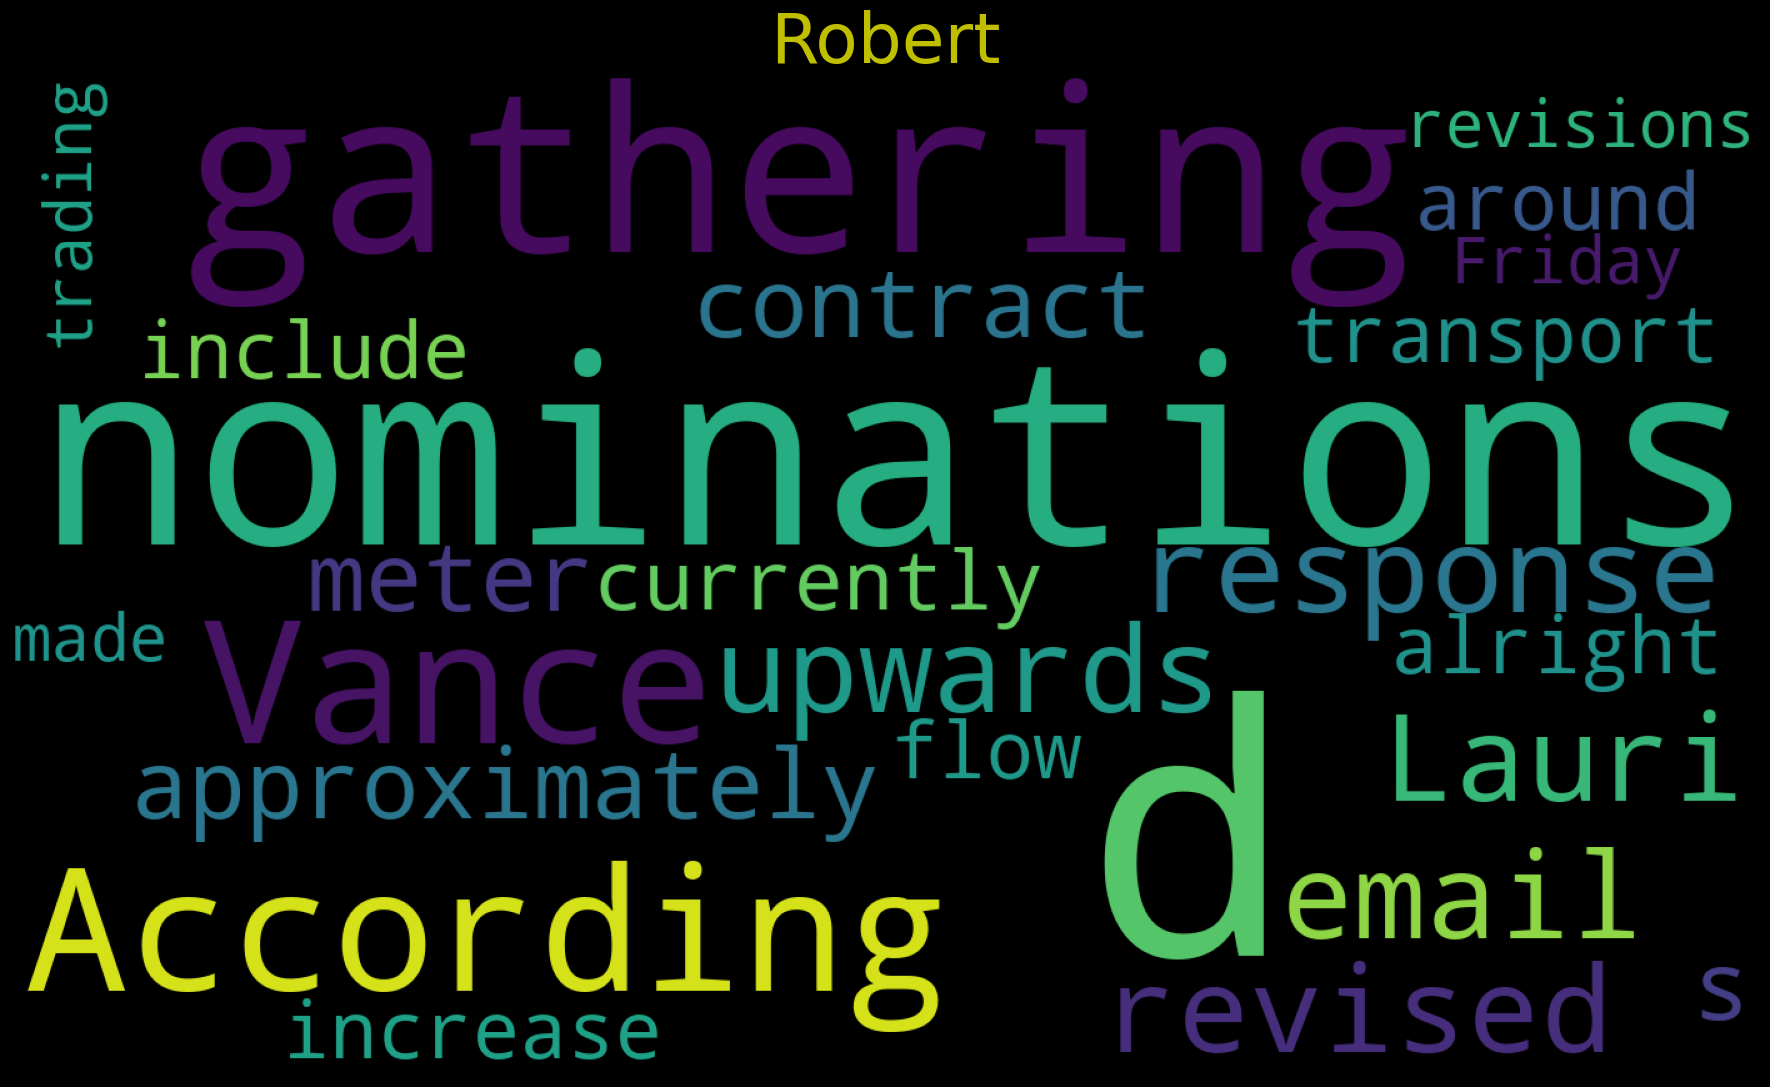

In [29]:
x = "Robert"
print(cloud(train[train.author == x]['text'].values,x))


In [30]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = train.copy()
sentiment['polarity_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.text.apply(lambda x:SIA.polarity_scores(x)['pos'])
sentiment['sentiment']=''
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'

# Normalize for Size
auth_sent= sentiment.groupby(['author','sentiment'])[['text']].count().reset_index()
for x in ['hello']:
    auth_sent.text[auth_sent.author == x] = (auth_sent.text[auth_sent.author == x]/\
        auth_sent[auth_sent.author ==x].text.sum())*100


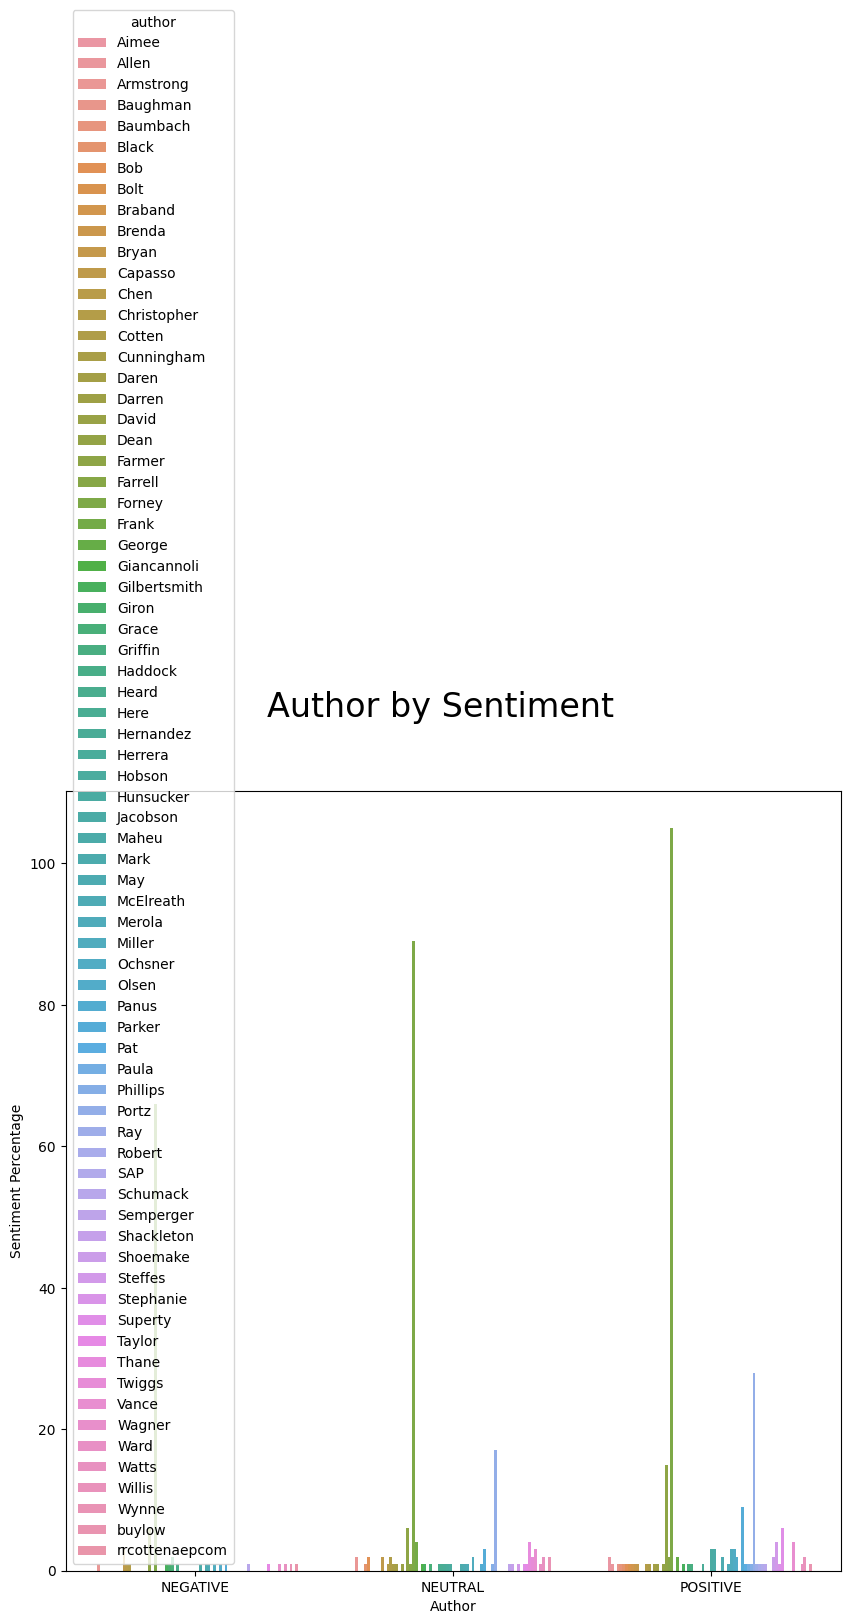

In [31]:
ax= sns.barplot(x='sentiment', y='text',hue='author',data=auth_sent)
ax.set(xlabel='Author', ylabel='Sentiment Percentage')
ax.figure.suptitle("Author by Sentiment", fontsize = 24)
plt.show()


#### Meta features

1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Number of title case words
8. Average length of the words


In [32]:
stop_words = set(stopwords.words("english"))
stop_words
len(stop_words)

179

In [33]:
## number of words in text 
train['num_words'] = train['text'].apply(lambda x : len(str(x).split()))
test['num_words'] = test['text'].apply(lambda x : len(str(x).split()))

## number of unique words in the text 
train['unique_words'] = train['text'].apply(lambda x : len(set(str(x).split())))
test['unique_words'] = test['text'].apply(lambda x : len(set(str(x).split())))

## num of characters in the text
train['char'] = train['text'].apply(lambda x : len(str(x)))
test['char'] = test['text'].apply(lambda x : len(str(x)))

## num of stop_words
train['stop_words'] = train['text'].apply(lambda x : len([w for w in str(x).lower().split() if w in stop_words]))
test['stop_words'] = test['text'].apply(lambda x : len([w for w in str(x).lower().split() if w in stop_words]))

## num of punctuations 
train['punc'] = train['text'].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))
test['punc'] = test['text'].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))

## num of upper case words
train['upper_case'] = train['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test['upper_case'] = test['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## number of title case words 
train['title_case'] = train['text'].apply(lambda x : len([c for c in str(x).split() if c.istitle()]))
test['title_case'] = test['text'].apply(lambda x : len([c for c in str(x).split() if c.istitle()]))

## average len words 
train['avg_words'] = train['text'].apply(lambda x : np.mean([len(w) for w in str(x).split()]))
test['avg_words'] = test['text'].apply(lambda x : np.mean([len(w) for w in str(x).split()]))

<AxesSubplot: xlabel='author', ylabel='avg_words'>

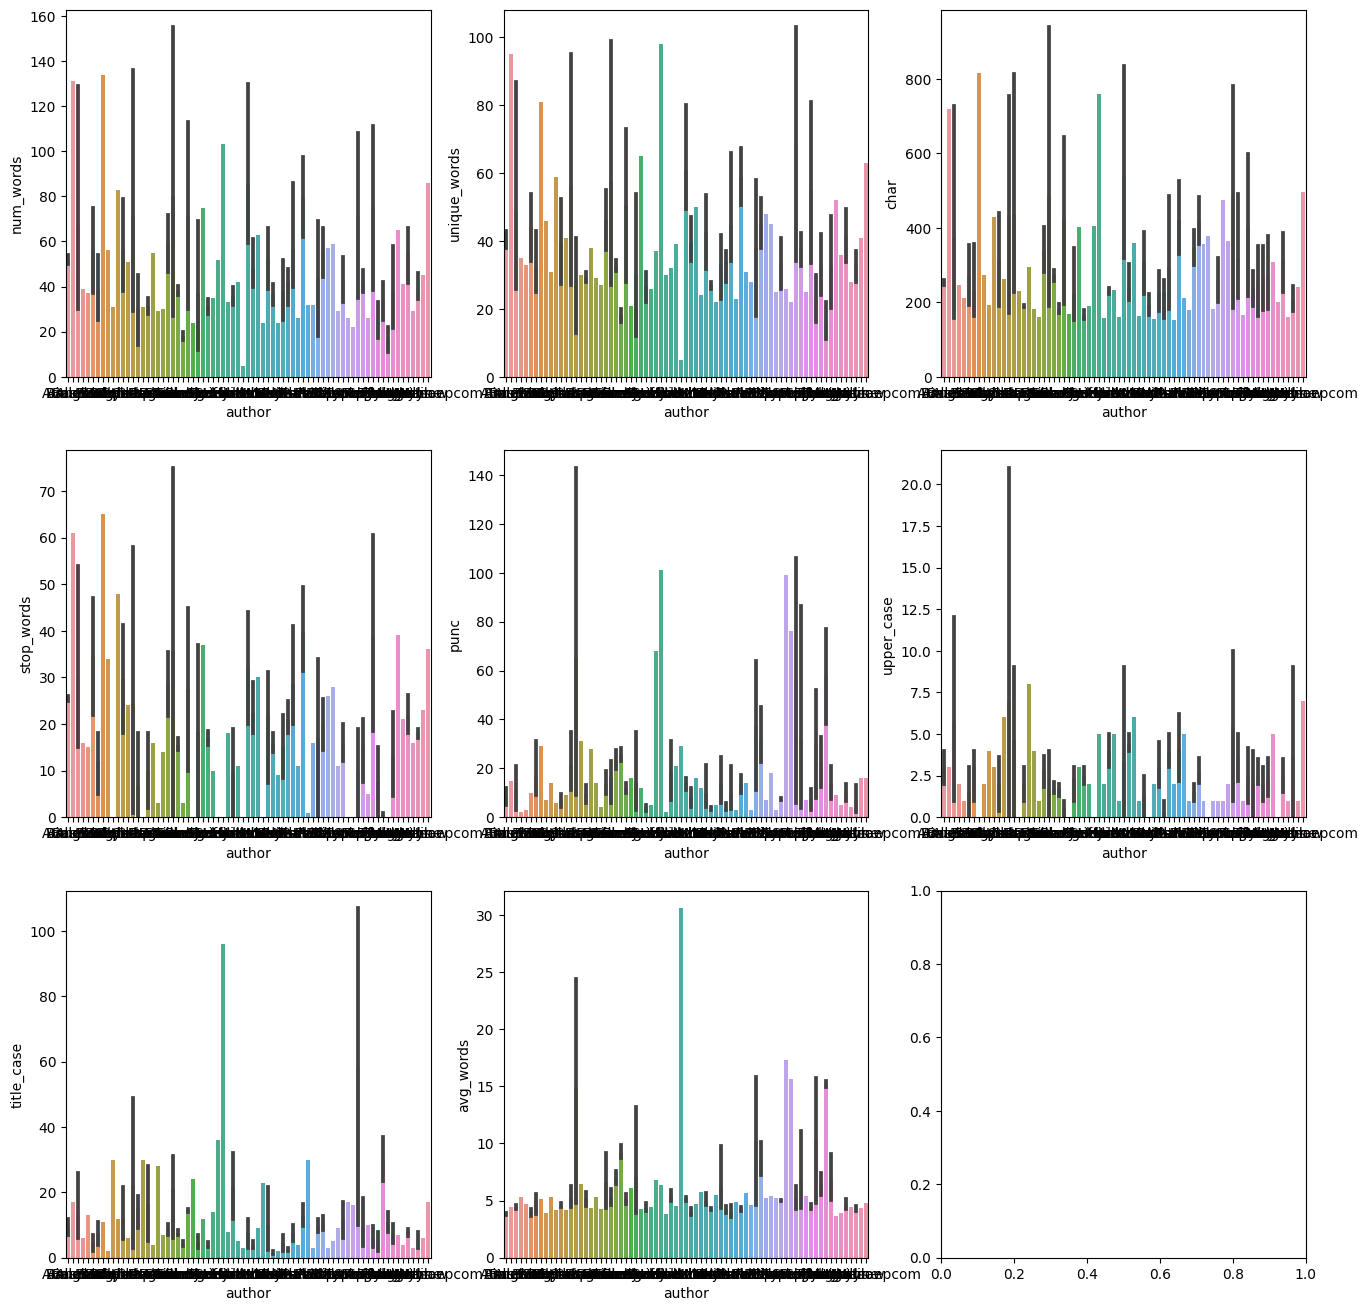

In [34]:
## plot some graphs based on some new features 
#features = ['num_words','unique_word','char','stop_words','punc','upper_case','title_case','mean_words']
_, axes = plt.subplots(3,3, figsize=(16,16))
axes = axes.flatten()
sns.barplot(x = 'author' , y = 'num_words' , data = train,ax=axes[0])
sns.barplot(x = 'author' , y = 'unique_words' , data = train,ax=axes[1])
sns.barplot(x = 'author' , y = 'char' , data = train,ax=axes[2])
sns.barplot(x = 'author' , y = 'stop_words' , data = train,ax=axes[3])
sns.barplot(x = 'author' , y = 'punc' , data = train,ax=axes[4])
sns.barplot(x = 'author' , y = 'upper_case' , data = train,ax=axes[5])
sns.barplot(x = 'author' , y = 'title_case' , data = train,ax=axes[6])
sns.barplot(x = 'author' , y = 'avg_words' , data = train,ax=axes[7])

#for i, feature in enumerate(features):
#    sns.barplot(x='author', y=feature, data=train, ax=axes[int(i/3),i%3])
#plt.show()

#### Logistic Regression

In [35]:
X = train['text']
y = train['author']

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=8)
logreg

LogisticRegression(random_state=8)

In [37]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=123)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(390,) (390,) (98,) (98,)


In [38]:
print(train_y.value_counts(),'\n', test_y.value_counts())

Forney            214
Portz              35
Farmer             19
Parker             12
Miller              5
                 ... 
Cunningham          0
Panus               0
Bolt                0
Baumbach            0
rrcottenaepcom      0
Name: author, Length: 73, dtype: int64 
 Forney         46
Portz          10
Farmer          8
Watts           2
Vance           2
               ..
Chen            0
Bryan           0
Brenda          0
Giancannoli     0
Pat             0
Name: author, Length: 73, dtype: int64


In [39]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# vect = CountVectorizer()
vect = CountVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b|\,|\.|\;|\:')
vect

CountVectorizer(lowercase=False, token_pattern='(?u)\\b\\w+\\b|\\,|\\.|\\;|\\:')

In [40]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
train_X_dtm = vect.fit_transform(train_X)
# examine the document-term matrix created from X_train
train_X_dtm

<390x3530 sparse matrix of type '<class 'numpy.int64'>'
	with 15848 stored elements in Compressed Sparse Row format>

In [41]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm

<98x3530 sparse matrix of type '<class 'numpy.int64'>'
	with 3522 stored elements in Compressed Sparse Row format>

In [42]:
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')


In [43]:
from string import punctuation
train_X_chars = train_X.str.len()
train_X_punc = train_X.apply(lambda x: len([c for c in str(x) if c in punctuation]))
test_X_chars = test_X.str.len()
test_X_punc = test_X.apply(lambda x: len([c for c in str(x) if c in punctuation]))
train_X_dtm = add_feature(train_X_dtm, [train_X_chars, train_X_punc])
test_X_dtm = add_feature(test_X_dtm, [test_X_chars, test_X_punc])


In [44]:
train_X_dtm

<390x3532 sparse matrix of type '<class 'numpy.int64'>'
	with 16628 stored elements in Compressed Sparse Row format>

In [45]:
test_X_dtm

<98x3532 sparse matrix of type '<class 'numpy.int64'>'
	with 3718 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=8)
logreg

LogisticRegression(random_state=8)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid_values = {'C':[0.01, 0.1, 1.0, 3.0, 5.0]}
grid_logreg = GridSearchCV(logreg, param_grid=grid_values, scoring='neg_log_loss')
grid_logreg.fit(train_X_dtm, train_y)
grid_logreg.best_params_

{'C': 0.01}

In [49]:
# set with recommended parameter
logreg = LogisticRegression(C=1.0, random_state=8)
# train the model using train_X_dtm & train_y
logreg.fit(train_X_dtm, train_y)

LogisticRegression(random_state=8)

In [50]:
# make class predictions for test_X_dtm
y_pred_test = logreg.predict(test_X_dtm)

In [51]:
# look at the confusion matrix for y_test
metrics.confusion_matrix(test_y, y_pred_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
# compute the predicted probabilities for X_test_dtm
y_pred_prob = logreg.predict_proba(test_X_dtm)
y_pred_prob[:10]

array([[2.79622198e-03, 6.39344891e-03, 1.13880134e-02, 2.14791140e-03,
        6.87175351e-03, 2.54886012e-04, 2.51782863e-03, 9.37402283e-05,
        5.43695107e-03, 9.24291754e-03, 1.78531831e-03, 3.79018132e-04,
        3.50761178e-05, 5.06305319e-04, 7.08388697e-04, 1.77348172e-04,
        5.26871294e-11, 3.82425581e-01, 7.23188798e-03, 1.06370376e-01,
        8.24617603e-08, 9.32364817e-03, 1.04470853e-06, 7.23282453e-04,
        5.05879623e-03, 8.79237020e-04, 2.05702036e-10, 2.87010631e-12,
        1.05931363e-03, 1.89011643e-03, 5.64136454e-04, 1.21285271e-12,
        8.40590268e-03, 5.99960532e-03, 1.60119319e-03, 1.32631592e-12,
        4.37488141e-03, 1.67255284e-09, 2.35781878e-04, 1.03243463e-03,
        2.17650928e-03, 3.93344118e-03, 3.58188955e-01, 1.59690013e-04,
        3.01193259e-04, 8.65128910e-04, 3.14667457e-04, 2.32371267e-03,
        9.01953797e-04, 6.15419136e-03, 1.40539423e-16, 1.25101148e-12,
        1.42879514e-11, 2.68651168e-03, 1.97312314e-07, 1.523400

In [53]:
train = pd.read_csv('../Data/writing_style_dataset.csv', delimiter='*')
## look at the first few rows
train.head()

,text,author
0,"According to Vance's response to Lauri's email, the nominations should be revised upwards approximately 650/d on the gathering contract(s) at this meter. There is currently nominations of 1,353/d (1,153 gathering and 200 transport). The flow should be around 2,000/d. Is it alright to include the increase of 650/d with the other revisions to be made after trading on Friday?",Robert
1,"Effective 3/1/2001, HPLC amended its contract with Royal Production changing the price to 100% HSC less $0.16 and extending the term through 2/28/02. Consequently, for March, HPLC should be purhasing volumes from two wells at meter 5310. Effective April, HPLC amended the same contract releasing the L.G. Talbert #2 lease in the committed reserves agreement; Mike Morris is the gas buyer and expects volumes of approximately 2000mmbtu/d. For April I nom 1132/d; Bob, we should probably increase...",Vance
2,"Louis Cox with Copano (the interconnecting party at this meter) informed me that effective March 1st, we should have been buying incremental gas from Royal Production at this point since they were no longer selling it to Copano. There have been no changes in the producer services noms at this point, however. This point appears to be on a 14 day chart and the last flow I have access to shows noms of 1332mm with BAV of 3497mm on March 18th. Bob/Vance- could one of you guys check into this a...",Allen
3,"X-cc: Weissman, George </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=88372C14-8DEBAA6B-862564B5-68FD6F>, Daren J Farmer/HOU/ECT@ENRON <??SDaren J Farmer/HOU/ECT@ENRON>, Graves, Melissa </O=ENRON/OU=NA/CN=RECIPIENTS/CN=MGRAVES>, Susan Smith/HOU/ECT@ENRON <??SSusan Smith/HOU/ECT@ENRON>",Taylor
4,"I'm still concern about April's nom; if we don't take it to zero, than we could have the possibility of the allocations group adding volumes to Barrett's April deal. This would be incorrect.",Taylor


In [54]:
### Split data

# split the data by author
byAuthor = train.groupby("author")

### Tokenize (split into individual words) our text

# word frequency by author
wordFreqByAuthor = nltk.probability.ConditionalFreqDist()

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    # split the text into individual tokens    
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    # calculate the frequency of each token
    frequency = nltk.FreqDist(tokens)

    # add the frequencies for each author to our dictionary
    wordFreqByAuthor[name] = (frequency)
    
# now we have an dictionary where each entry is the frequency distrobution
# of words for a specific author.     

In [63]:
# first, let's start with a test sentence
testSentence = "since koch has told you that they sold the properties to orgname i w "

# and then lowercase & tokenize our test sentence
preProcessedTestSentence = nltk.tokenize.word_tokenize(testSentence.lower())

# create an empy dataframe to put our output in
testProbailities = pd.DataFrame(columns = ['author','word','probability'])

# For each author...
for i in wordFreqByAuthor.keys():
    # for each word in our test sentence...
    for j  in preProcessedTestSentence:
        # find out how frequently the author used that word
        wordFreq = wordFreqByAuthor[i].freq(j)
        # and add a very small amount to every prob. so none of them are 0
        smoothedWordFreq = wordFreq + 0.000001
        # add the author, word and smoothed freq. to our dataframe
        output = pd.DataFrame([[i, j, smoothedWordFreq]], columns = ['author','word','probability'])
        testProbailities = testProbailities.append(output, ignore_index = True)

# empty dataframe for the probability that each author wrote the sentence
testProbailitiesByAuthor = pd.DataFrame(columns = ['author','jointProbability'])

# now let's group the dataframe with our frequency by author
for i in wordFreqByAuthor.keys():
    # get the joint probability that each author wrote each word
    oneAuthor = testProbailities.query('author == "' + i + '"')
    
    jointProbability = oneAuthor.product(numeric_only = True)[0]
    
    # and add that to our dataframe
    output = pd.DataFrame([[i, jointProbability]], columns = ['author','jointProbability'])
    print(output)
    testProbailitiesByAuthor = testProbailitiesByAuthor.append(output, ignore_index = True)


# and our winner is...
print(testProbailitiesByAuthor.loc[testProbailitiesByAuthor['jointProbability'].idxmax(),'author'])
print(jointProbability)

  author  jointProbability
0  Aimee      8.211845e-59
  author  jointProbability
0  Allen      4.910253e-56
      author  jointProbability
0  Armstrong      4.003919e-59
     author  jointProbability
0  Baughman      4.211383e-58
     author  jointProbability
0  Baumbach      5.000100e-80
  author  jointProbability
0  Black      1.007000e-58
  author  jointProbability
0    Bob      5.472547e-72
  author  jointProbability
0   Bolt      1.450315e-71
    author  jointProbability
0  Braband      1.267849e-57
   author  jointProbability
0  Brenda      1.000000e-84
  author  jointProbability
0  Bryan      5.107062e-71
    author  jointProbability
0  Capasso      5.487234e-63
  author  jointProbability
0   Chen      1.275599e-75
        author  jointProbability
0  Christopher      1.836611e-68
   author  jointProbability
0  Cotten      1.524405e-76
       author  jointProbability
0  Cunningham      1.639444e-80
  author  jointProbability
0  Daren      5.646096e-72
   author  jointProbability
